In [1]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv("../../res/SOL_daily_historical_data.csv")

dailyreturns = df["Close/Last"].pct_change().dropna()
dr_array =dailyreturns.to_numpy()
print(dr_array)

[-0.02831926 -0.0272876   0.0090955  -0.002632    0.02286599  0.00932532
 -0.03871785 -0.01979203  0.0379282   0.00158181  0.05622831 -0.04607167
 -0.02686852 -0.07055488  0.12315502 -0.01103346 -0.04902356 -0.08370184
  0.03985346 -0.04386778 -0.01097695  0.0228979   0.0289251  -0.00116579
  0.03844658  0.06636866 -0.04461866 -0.11473866  0.03534299  0.01947831]


### CALCULATE ROLLING VOLATILITY

### pandas way 

In [9]:
# pandas way

df["Vol20"] = dailyreturns.rolling(20).std()
df["Vol50"] = dailyreturns.rolling(50).std()
print(df)


          Date  Close/Last  Volume     Open     High      Low     Vol20  Vol50
0   09/08/2025     213.918     NaN  207.623  214.855  210.934       NaN    NaN
1   09/07/2025     207.860     NaN  202.867  208.922  205.655       NaN    NaN
2   09/06/2025     202.188     NaN  204.269  203.167  200.148       NaN    NaN
3   09/05/2025     204.027     NaN  203.547  204.633  203.198       NaN    NaN
4   09/04/2025     203.490     NaN  208.147  203.992  201.085       NaN    NaN
5   09/03/2025     208.143     NaN  210.086  211.931  207.620       NaN    NaN
6   09/02/2025     210.084     NaN  201.856  211.915  207.454       NaN    NaN
7   09/01/2025     201.950     NaN  198.582  203.194  196.824       NaN    NaN
8   08/31/2025     197.953     NaN  205.459  202.416  196.960       NaN    NaN
9   08/30/2025     205.461     NaN  205.617  206.579  202.859       NaN    NaN
10  08/29/2025     205.786     NaN  216.943  206.585  201.043       NaN    NaN
11  08/28/2025     217.357     NaN  208.134  217.765

### numpy methode 

In [14]:
# create 2 new columns vol20 and vol50 which include the result of the daily returns multiplies by the standard deviation of the specific period 
window = 20 
vol20 = np.array([
    dr_array[i-window:i].std() if i>= window else np.nan
    for i in range(len(dr_array)) 
]) 
print(vol20)



[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.04673336 0.04649731 0.04666297 0.04713925
 0.04714095 0.04768672 0.04994165 0.05019034 0.05602549 0.05593067]


In [ ]:
# create and empty array to store the calculated values 
vol20 = []
# iterate ove the 
for i in range(len(dr_array)):
    if i>=window: 
    # to make the loop start from 20 we use the [i-window:i]
        vol20.append(dr_array[i-window:i].std())
    # if the i ise under 20 we append no value
    else:
        vol20.append(np.nan)
# convert the list into numpy array since it shows unconverted data 
vol20 = np.array(vol20)
print(vol20)

[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.04673336 0.04649731 0.04666297 0.04713925
 0.04714095 0.04768672 0.04994165 0.05019034 0.05602549 0.05593067]


### plotting 

In [18]:
import matplotlib.pyplot as plt 

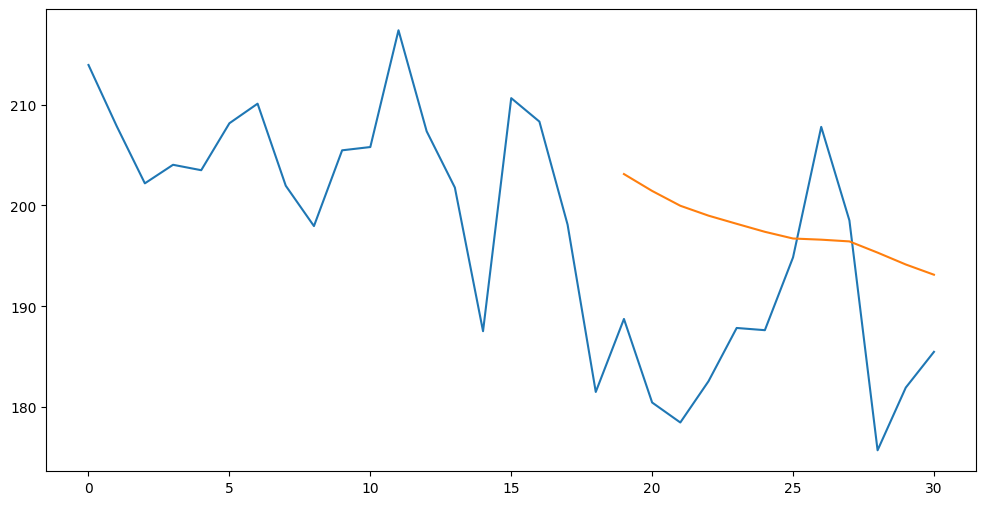

In [ ]:
df["MA20"] = df["Close/Last"].rolling(20).mean() 
df["MA50"] = df["Close/Last"].rolling(50).mean() 
plt.figure(figsize=(12,6))
plt.plot(df["Close/Last"], label="close price")
plt.plot(df["MA20"], label="close price")
plt.plot(df["MA50"], label="close price")
plt.show()